In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('chatgpt_style_reviews_dataset.xlsx')  
df.shape, df.head()
# quick checks
df['rating'].value_counts(), df['language'].value_counts(), df['platform'].value_counts()


(rating
 1    59
 3    57
 5    55
 4    41
 2    38
 Name: count, dtype: int64,
 language
 ru    27
 ar    26
 es    26
 zh    26
 en    26
 pt    24
 hi    24
 ja    24
 fr    24
 de    23
 Name: count, dtype: int64,
 platform
 Amazon         56
 App Store      55
 Website        54
 Flipkart       44
 Google Play    41
 Name: count, dtype: int64)

In [3]:
# simple mapping(Create sentiment labels)
def rating_to_sentiment(r):
    if r <= 2: return 'negative'
    if r == 3: return 'neutral'
    return 'positive'

df['sentiment'] = df['rating'].apply(rating_to_sentiment)
df['sentiment'].value_counts(normalize=True)


sentiment
negative    0.388
positive    0.384
neutral     0.228
Name: proportion, dtype: float64

In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop = set(stopwords.words('english'))
lem = WordNetLemmatizer()

def clean_text(text):
    if pd.isna(text): return ""
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+','', text)           # remove urls
    text = re.sub(r'[^a-z0-9\s]', ' ', text)            # keep alnum
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop and len(w)>1]
    tokens = [lem.lemmatize(w) for w in tokens]
    return " ".join(tokens)

df['clean_review'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GOWTHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GOWTHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = df['clean_review']
y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(x_train_tfidf, y_train)
pred = clf.predict(x_test_tfidf)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

    negative       0.40      0.53      0.45        19
     neutral       0.00      0.00      0.00        12
    positive       0.48      0.63      0.55        19

    accuracy                           0.44        50
   macro avg       0.29      0.39      0.33        50
weighted avg       0.33      0.44      0.38        50



d:\vscode\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\vscode\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\vscode\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [7]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

clf = LogisticRegression(max_iter=1000, class_weight=class_weights)
clf.fit(x_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,"{'negative': np.float64(0.8547008547008547), 'neutral': np.float64(1.4814814814814814), 'positive': np.float64(0.8658008658008658)}"
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 5, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}
grid = GridSearchCV(LogisticRegression(max_iter=2000, class_weight='balanced'),
                    param_grid, cv=3, scoring='f1_macro')
grid.fit(x_train_tfidf, y_train)
print(grid.best_params_)


{'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [9]:
--

SyntaxError: invalid syntax (3659366440.py, line 1)

In [ ]:
pip install deep-translator


     ---------------------------------------- 0.0/42.3 kB ? eta -:--:--
     -------------------------------------- 42.3/42.3 kB 681.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/106.4 kB ? eta -:--:--
     -------------------------------------- 106.4/106.4 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install sentence-transformers deep-translator


  Using cached sentence_transformers-5.1.2-py3-none-any.whl (488 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install xgboost


     ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
     ---------------------------------------- 0.1/72.0 MB 1.1 MB/s eta 0:01:06
     ---------------------------------------- 0.1/72.0 MB 1.1 MB/s eta 0:01:06
     --------------------------------------- 0.2/72.0 MB 908.0 kB/s eta 0:01:20
     --------------------------------------- 0.2/72.0 MB 888.4 kB/s eta 0:01:21
     ---------------------------------------- 0.6/72.0 MB 1.8 MB/s eta 0:00:39
     ---------------------------------------- 0.9/72.0 MB 2.5 MB/s eta 0:00:29
      --------------------------------------- 1.2/72.0 MB 2.9 MB/s eta 0:00:25
      --------------------------------------- 1.5/72.0 MB 3.2 MB/s eta 0:00:22
      --------------------------------------- 1.7/72.0 MB 3.5 MB/s eta 0:00:21
     - -------------------------------------- 2.0/72.0 MB 3.8 MB/s eta 


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GOWTHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Batches: 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]


✅ Best Threshold: 0.30 | Macro F1 improved to: 0.64

=== IMPROVED MODEL RESULTS ===
              precision    recall  f1-score   support

    negative       0.64      0.45      0.53        20
    positive       0.56      0.74      0.64        19

    accuracy                           0.59        39
   macro avg       0.60      0.59      0.58        39
weighted avg       0.60      0.59      0.58        39

Accuracy: 0.5897435897435898
Macro F1: 0.6363636363636364


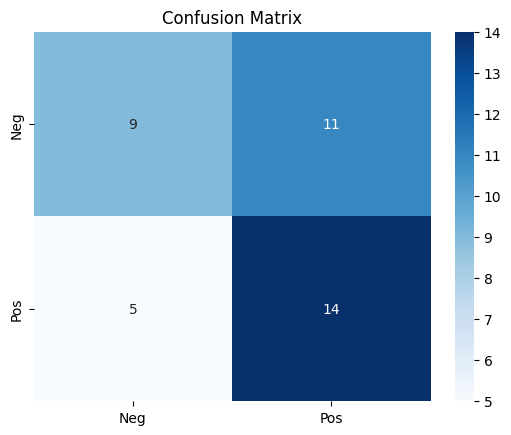


💾 Model Saved Successfully!


In [ ]:
# ---------------------------------------------------------------
# STEP 1 : Import Libraries
# ---------------------------------------------------------------
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sentence Embeddings
from sentence_transformers import SentenceTransformer

# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb

# ---------------------------------------------------------------
# STEP 2 : Load Dataset
# ---------------------------------------------------------------
df = pd.read_excel('chatgpt_style_reviews_dataset.xlsx')
df = df.dropna(subset=['review'])

# ---------------------------------------------------------------
# STEP 3 : Map Rating → Sentiment
# ---------------------------------------------------------------
def rating_to_sentiment(r):
    if r <= 2:
        return 'negative'
    elif r >= 4:
        return 'positive'
    return np.nan

df['sentiment'] = df['rating'].apply(rating_to_sentiment)
df = df.dropna(subset=['sentiment'])

# ---------------------------------------------------------------
# STEP 4 : Text Cleaning
# ---------------------------------------------------------------
stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()

def clean_text(txt):
    txt = re.sub(r"http\S+|www\S+", "", str(txt))
    txt = re.sub(r"[^a-zA-Z\s]", "", txt.lower())
    words = [lem.lemmatize(w) for w in txt.split() if w not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(clean_text)

# ---------------------------------------------------------------
# STEP 5 : Split Dataset
# ---------------------------------------------------------------
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------------------------
# STEP 6 : SentenceTransformer Embedding
# ---------------------------------------------------------------
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
X_train_emb = model.encode(X_train.tolist(), show_progress_bar=True)
X_test_emb = model.encode(X_test.tolist(), show_progress_bar=True)

# ---------------------------------------------------------------
# STEP 7 : Handle Class Imbalance Automatically
# ---------------------------------------------------------------
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

scale_pos = class_weights['negative'] / class_weights['positive']  # For XGBoost

# ---------------------------------------------------------------
# STEP 8 : Train XGBoost Classifier
# ---------------------------------------------------------------
clf = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.7,
    colsample_bytree=0.9,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos,
    random_state=42
)

clf.fit(X_train_emb, (y_train == 'positive').astype(int))

# ---------------------------------------------------------------
# STEP 9 : Prediction + Threshold Tuning
# ---------------------------------------------------------------
y_prob = clf.predict_proba(X_test_emb)[:, 1]

best_f1 = 0
best_t = 0.5
for t in np.arange(0.3, 0.7, 0.01):
    y_pred = (y_prob >= t).astype(int)
    f1 = f1_score((y_test=='positive'), y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print(f"✅ Best Threshold: {best_t:.2f} | Macro F1 improved to: {best_f1:.2f}")

y_pred = (y_prob >= best_t).astype(int)

# ---------------------------------------------------------------
# STEP 10 : Evaluation
# ---------------------------------------------------------------
print("\n=== IMPROVED MODEL RESULTS ===")
print(classification_report((y_test=='positive'), y_pred, target_names=['negative','positive']))
print("Accuracy:", accuracy_score((y_test=='positive'), y_pred))
print("Macro F1:", f1_score((y_test=='positive'), y_pred, average='binary'))

cm = confusion_matrix((y_test=='positive'), y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg','Pos'], yticklabels=['Neg','Pos'])
plt.title("Confusion Matrix")
plt.show()

# ---------------------------------------------------------------
# STEP 11 : Save Model
# ---------------------------------------------------------------
import joblib
joblib.dump(clf, 'sentiment_xgboost_model.pkl')
joblib.dump(model, 'sentence_transformer_model.pkl')
print("\n💾 Model Saved Successfully!")
